
Devoir PHYS-F-302, année académique 2019-2020


Soit l'équation différentielle linéaire à coefficients constants:

$$\begin{align}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0\hspace{5cm} (1)
\end{align}$$
où $f$ est une fonction de la variable $x\in [0\ 1]$. Par ailleurs, on a les conditions aux bords suivantes:

$$
f(0)=a, f'(0)=b, f(1)=c, f'(1)=d \hspace{3cm} (2)
$$

Question 1 (2 points)

Quelle est la solution générale de l'équation (1)?

On pose que la solution f est une combinaison linéaire du type $f=\sum_{i=1}^{4} C_i.exp(k_i.x)$.  En remplaçant dans l'équantion on obtient donc une équation du 4eme degré en k et on obtient la solution générale suivante :
$$ f(x) = C_1.e^{x} + C_2.e^{-x}+C_3.e^{2x}+C_4.e^{-2x}$$



Question 2 (3 points)

Ecrire un code en python qui permet d'évaluer les constantes d'intégration de la solution générale en termes des conditions aux bords (2). Pour cette question vous pouvez vous servir de n'importe quelle routine fournie par numpy.

Si on applique les conditons au bords à notre fonction, on obtient 4 conditions qui forment un système d'équation linéaire équivalent à $M.v=w$ avec $v=(C_1,C_2,C_3,C_4)$ et $w=(a,b,c,d)$ et $M$ la matrice qui dépend des conditions.  Python permet de résoudre un tel système de manière très simple: 

In [56]:
from matplotlib import pyplot
import numpy 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [57]:
def resol_consantes (a,b,c,d) : 


    M = np.array([[1,1,1,1], [1,-1,2,-2], [np.exp(1),np.exp(-1),np.exp(2),np.exp(-2)],\
              [np.exp(1),- np.exp(-1),2*np.exp(2),-2*np.exp(-2)]])
    w = np.array([a,b,c,d])

    constantes = np.linalg.solve(M, w)

    return constantes

Question 3 (2 points)

Que vaut la solution de l'équation (1) pour $a=0, b=0, c=1, d=-1$. Représentez cette fonction sur un graphique.

Il suffit d'appliquer la question 2 à nos données : 

In [58]:
C = resol_consantes (0,0,1,-1)

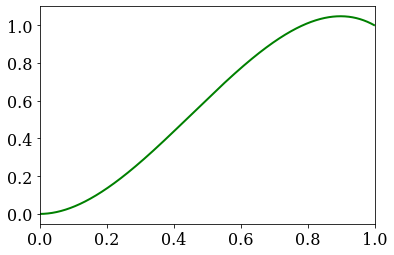

In [59]:
#plot
binwidth=0.001
pyplot.xlim(0,1)
bins=numpy.arange(0.,1., binwidth)

xc = bins[:-1] + binwidth/2
pyplot.plot(xc, C[0]*np.exp(xc) + C[1]*np.exp(- xc) + C[2]*np.exp(2*xc) + C[3]*np.exp(-2*xc)  , lw=2, color='green')


Question 4 (6 points)

Résoudre l'équation (1) avec la méthode Gauss-Seidel vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

On commence par discrétiser notre équation : on connait la discrétisation centrale de la dérivée segonde : 
$$\frac{p_{i+1} -2 p_i +p_{i-1}}{\Delta x^2}$$

on la réaplique à elle-même (à chaque terme) pour déterminer la dérivée 4ème : 
$$\frac{p_{i+2}-4p_{i+1}+6p_i-4p_{i-1}+p_{i-2}}{\Delta x^4}$$

En dévellopant notre équation, on trouve la relation suivante : 

$$p_i.\nu = (-p_{i-2} - p_{i+2} - \mu.p_{i-1} -\mu.p_{i+1})$$

où $\nu =(6+10\Delta x^2 + 4\Delta x^4)$ et $\mu = (-4-5\Delta x^2)$ 

On a posé ces variables afin de pouvoir écrire notre code de manière plus lisible et donc sans se tromper.

Passons mainteant à l'algorythme de Gauss-Seidel : 

In [60]:
def L2_norm(p, pn):
    return numpy.sqrt(numpy.sum((p - pn)**2)/numpy.sum(pn**2))

In [61]:
def solution_gauss_seidel(dx,p0, maxiter, rtol):
    
    p = p0.copy()
    nu = 6+10*dx**2+4*dx**4
    mu = -4-5*dx**2
    diff = rtol + 1.0  # on pose cela pour pouvoir rentrer dans la boucle
    ite = 0  # nombre d'itérations
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        for i in range(2,nx-2):
            p[i] = (1/nu)*(-p[i-2]-mu*p[i-1]-mu*p[i+1]-p[i+2])
            
        #conditions au bord 
        p[0]=0
        p[1]=0
        p[-1]=1
        p[-2]=p[-1]+dx
        
        #mise à jour de diff
        diff = L2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [62]:
#on pose nos variables et on lance l'algo :
nx = 101
dx = 1.0/(nx-1)

p0 = numpy.zeros(nx)

pf, iterations, last_diff = solution_gauss_seidel(dx,p0, 3000000, 1e-8)


C:\Users\luel7\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


afin de vérifier notre résultat, on va créer une array nous donnant la valeur de $f(x)=p_{exact}$ à chacun des points x évalués dans notre algo afin de pouvoir comparer notre réponse et la solution exacte :

In [63]:
grid = numpy.linspace(0., 1., nx) 

p_exact = numpy.zeros(nx)
p_exact[:]= C[0]*np.exp(grid[:]) + C[1]*np.exp(- grid[:]) + C[2]*np.exp(2*grid[:]) + C[3]*np.exp(-2*grid[:])


nombre d'itérations 2531622
dernier L2_norm 9.999990576239512e-09


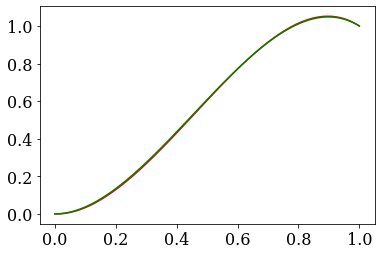

In [65]:
x = numpy.linspace(0,1,nx)
pyplot.plot(x,pf,color ='red')
pyplot.plot(x,p_exact,color ='green')

print ("nombre d'itérations", iterations) 
print ("dernier L2_norm", last_diff)

On voit bien que la solution trouvée par Gauss-Seidel (en rouge) coïncide bien avec la solution exacte (en vert).  
On va maintenant regarder ce que nous donne la L2_norm entre les 2:

In [66]:
erreur = L2_norm(pf, p_exact)
print("L2_norm entre solution exacte et Gauss Seidel",erreur)

L2_norm entre solution exacte et Gauss Seidel 0.005822658203037972


Question 5 (7 points)

Résoudre l'équation (1) avec la méthode du gradient conjugué vue dans le cours. Combien d'itérations sont nécessaires? Comparer votre solution avec la solution obtenue à la question 3 (graphiquement et en mesurant la norme L2 de la différence).

Si on réécrit notre discrétisation précédente de manière un peu différente, on a : 
$$ p_i.\nu +p_{i-2} + p_{i+2} + \mu.p_{i-1} +\mu.p_{i+1} = 0  $$

On peut donc interpreter cette relation comme $A.p=b=0$ avec p un vecteur de taille nx et A une matrice nx*nx.

Dès lors on peut appliquer l'algorythme du gradient conjugué : 

    

In [67]:
def l2_norm(p, pk):
    
    return numpy.sqrt(numpy.sum((p - pk)**2)/numpy.sum(pk**2))

In [68]:
def solution_conjugate_gradient(p0, b, dx, maxiter, rtol):
    
    nu = 6+10*dx**2+4*dx**4
    mu = -4-5*dx**2                            
    def A(p):
        return nu*p[2:-2]+p[4:]+p[0:-4]+mu*p[3:-1]+mu*p[1:-3]
    
    p = p0.copy() 
    p[0]=0     #conditions aux bords
    p[1]=0
    p[-1]=1
    p[-2]=p[-1]+dx 

    
    r = numpy.zeros_like(p)  # résidu initial
    Ad = numpy.zeros_like(p)  # afin de garder A.d
   
    diff = rtol + 1  # on pose cela pour lancer la boucle
    ite = 0  # nombre d'itérations
    r[2:-2] = b - A(p) #définition du résidu initial avec les coordonnées restantes qui sont nulles
    d = r.copy() #le premier changement de direction est le résidu
    
    while diff > rtol and ite < maxiter:
        
        
        pk = p.copy()
        rk = r.copy()
        Ad[2:-2] = A(d)
        alpha = numpy.sum(r * r) / numpy.sum(d * Ad)
        p = pk + alpha * d
        r = rk - alpha * Ad
        beta = numpy.sum(r * r) / numpy.sum(rk * rk)
        d = r + beta * d
            
        #mise à jour de diff
        diff = l2_norm(p, pk)
        ite += 1
        
    return p, ite, diff
    

In [69]:
#on pose les variables et on lance l'algo :
nx = 101
dx = 1.0/(nx-1)
b=0
maxiter = 20000000
rtol =1e-9
p0 = numpy.zeros(nx)


pfinal, ites, last_difference = solution_conjugate_gradient(p0, b, dx, maxiter, rtol)
print("itérations",ites)
print("dernier l2_norm",last_difference)

itérations 297
dernier l2_norm 8.953250687073168e-10


itérations 297
dernier l2_norm 8.953250687073168e-10


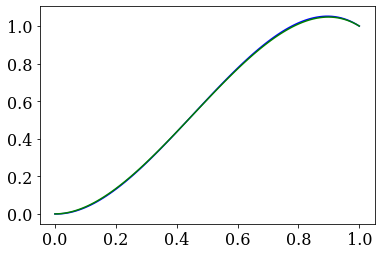

In [70]:
pyplot.plot(x,pfinal,color ='blue')
pyplot.plot(x,p_exact,color ='green')

print("itérations",ites)
print("dernier l2_norm",last_difference)

on voit la solution exacte en vert et celle du GC en bleue.

In [71]:
erreur =  l2_norm(pfinal, p_exact)
print ("l2_norm entre solution exacte et GC",erreur)

l2_norm entre solution exacte et GC 0.005160195476445877


On observe donc que pour un résultat de précision similaire, l'algo de Gauss-Seidel aura pris environ 2 500 000 itérations tandis que l'algo du gradient conjugué seulement 300.